# Temperature Forecast Project using ML

# Project Description

 This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T



You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv



# EXPLORATION OF DATASET:

In [2]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Downloading the raw data and loading into dataframe with the help of pandas library
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")

In [4]:
#For viewing the first 5 columns in given dataset
df.head(5)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
#To know about the no of rows and columns in the dataset
df.shape

(7752, 25)

There are 7752 rows and 25 columns in the dataset.

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
for i in df.columns:
    print("Unique Value count of",i,"column:",len(df[i].unique()))

Unique Value count of station column: 26
Unique Value count of Date column: 311
Unique Value count of Present_Tmax column: 168
Unique Value count of Present_Tmin column: 156
Unique Value count of LDAPS_RHmin column: 7673
Unique Value count of LDAPS_RHmax column: 7665
Unique Value count of LDAPS_Tmax_lapse column: 7676
Unique Value count of LDAPS_Tmin_lapse column: 7676
Unique Value count of LDAPS_WS column: 7676
Unique Value count of LDAPS_LH column: 7676
Unique Value count of LDAPS_CC1 column: 7570
Unique Value count of LDAPS_CC2 column: 7583
Unique Value count of LDAPS_CC3 column: 7600
Unique Value count of LDAPS_CC4 column: 7525
Unique Value count of LDAPS_PPT1 column: 2813
Unique Value count of LDAPS_PPT2 column: 2511
Unique Value count of LDAPS_PPT3 column: 2357
Unique Value count of LDAPS_PPT4 column: 1919
Unique Value count of lat column: 12
Unique Value count of lon column: 25
Unique Value count of DEM column: 25
Unique Value count of Slope column: 27
Unique Value count of Sola

From this exploration we can see that there are 7752 rows and 25 columns in the dataset.In which only one column date has the object dataype all other columns has float datatype.

# Identifying the missing values:

In [9]:
# Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

Handling the missing values by removing the rows which has missing values since less than 1 percent of the data is missing it is not gonna affect the performance model will learn from the balance training data.

In [10]:
# dropping all null values
df=df.dropna()

In [11]:
df.shape

(7588, 25)

There is 2.11% of dataloss in the dataset.

In [12]:
#To know about the missing values in the given dataset
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

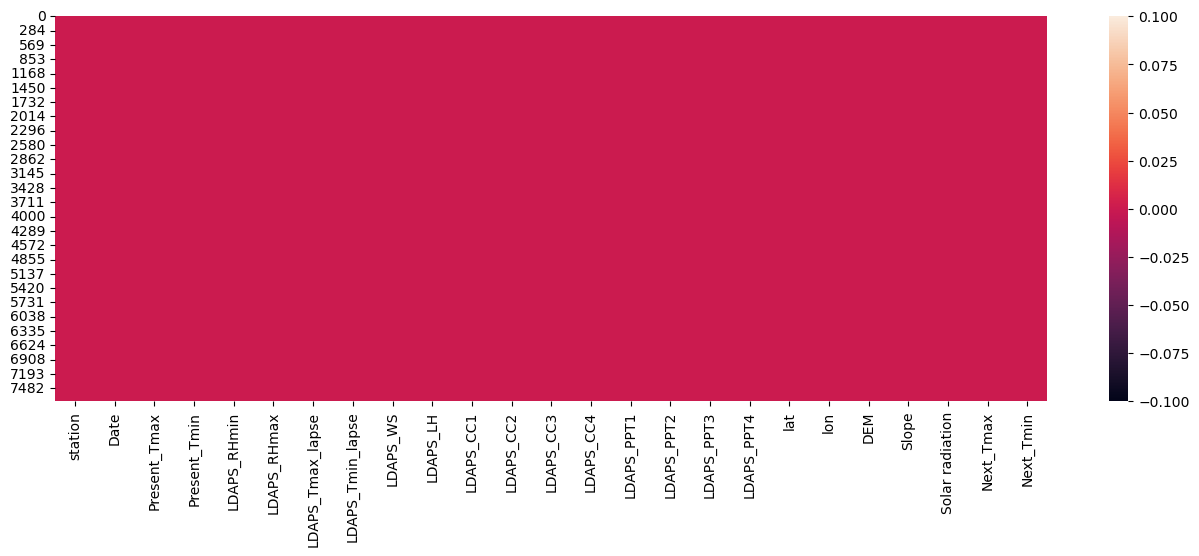

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull())

There is no missing values in the dataset we can further proceed the dataset for the further analysis.

# Statistical Analysis of the dataset:

In [14]:
#To know more about the statistical description of the dataset
df.describe().T

count         mean         std          min          25%  \
station           7588.0    13.014101    7.217858     1.000000     7.000000   
Present_Tmax      7588.0    29.748366    2.967401    20.000000    27.800000   
Present_Tmin      7588.0    23.195809    2.400880    11.300000    21.600000   
LDAPS_RHmin       7588.0    56.724969   14.626559    19.794666    45.960243   
LDAPS_RHmax       7588.0    88.360823    7.199456    58.936283    84.203724   
LDAPS_Tmax_lapse  7588.0    29.620128    2.943496    17.624954    27.673756   
LDAPS_Tmin_lapse  7588.0    23.511786    2.342579    14.272646    22.086820   
LDAPS_WS          7588.0     7.094097    2.177034     2.882580     5.675358   
LDAPS_LH          7588.0    62.492606   33.686158   -13.603212    37.206201   
LDAPS_CC1         7588.0     0.368510    0.262260     0.000000     0.146546   
LDAPS_CC2         7588.0     0.355528    0.257922     0.000000     0.140324   
LDAPS_CC3         7588.0     0.317546    0.249833     0.000000     0.100950   
LDAPS_CC4         7588.0     0.298268    0.253392     0.000000     0.081495   
LDAPS_PPT1        7588.0     0.589008    1.927577     0.000000     0.000000   
LDAPS_PPT2        7588.0     0.480738    1.743327     0.000000     0.000000   
LDAPS_PPT3        7588.0     0.275007    1.146087     0.000000     0.000000   
LDAPS_PPT4        7588.0     0.265373    1.179661     0.000000     0.000000   
lat               7588.0    37.544792    0.050428    37.456200    37.510200   
lon               7588.0   126.991420    0.079220   126.826000   126.937000   
DEM               7588.0    61.918136   54.323529    12.370000    28.700000   
Slope             7588.0     1.259755    1.372748     0.098500     0.271300   
Solar radiation   7588.0  5343.724208  429.782561  4329.520508  5001.485717   
Next_Tmax         7588.0    30.241526    3.111807    17.400000    28.200000   
Next_Tmin         7588.0    22.910820    2.482256    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.800000    29.900000  
LDAPS_RHmin         55.023199    67.115099    98.524734  
LDAPS_RHmax         89.784122    93.742725   100.000153  
LDAPS_Tmax_lapse    29.709537    31.711109    38.542255  
LDAPS_Tmin_lapse    23.758249    25.155660    29.619342  
LDAPS_WS             6.547838     8.028960    21.857621  
LDAPS_LH            56.898324    84.235666   213.414006  
LDAPS_CC1            0.315706     0.574174     0.967277  
LDAPS_CC2            0.311676     0.557164     0.968353  
LDAPS_CC3            0.261795     0.496444     0.983789  
LDAPS_CC4            0.227459     0.498127     0.974710  
LDAPS_PPT1           0.000000     0.052594    23.701544  
LDAPS_PPT2           0.000000     0.017735    21.621661  
LDAPS_PPT3           0.000000     0.007855    15.841235  
LDAPS_PPT4           0.000000     0.000017    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178200  
Solar radiation   5441.987305  5729.485840  5992.895996  
Next_Tmax           30.400000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

In [15]:
num_col=df.drop("Date",axis=1)

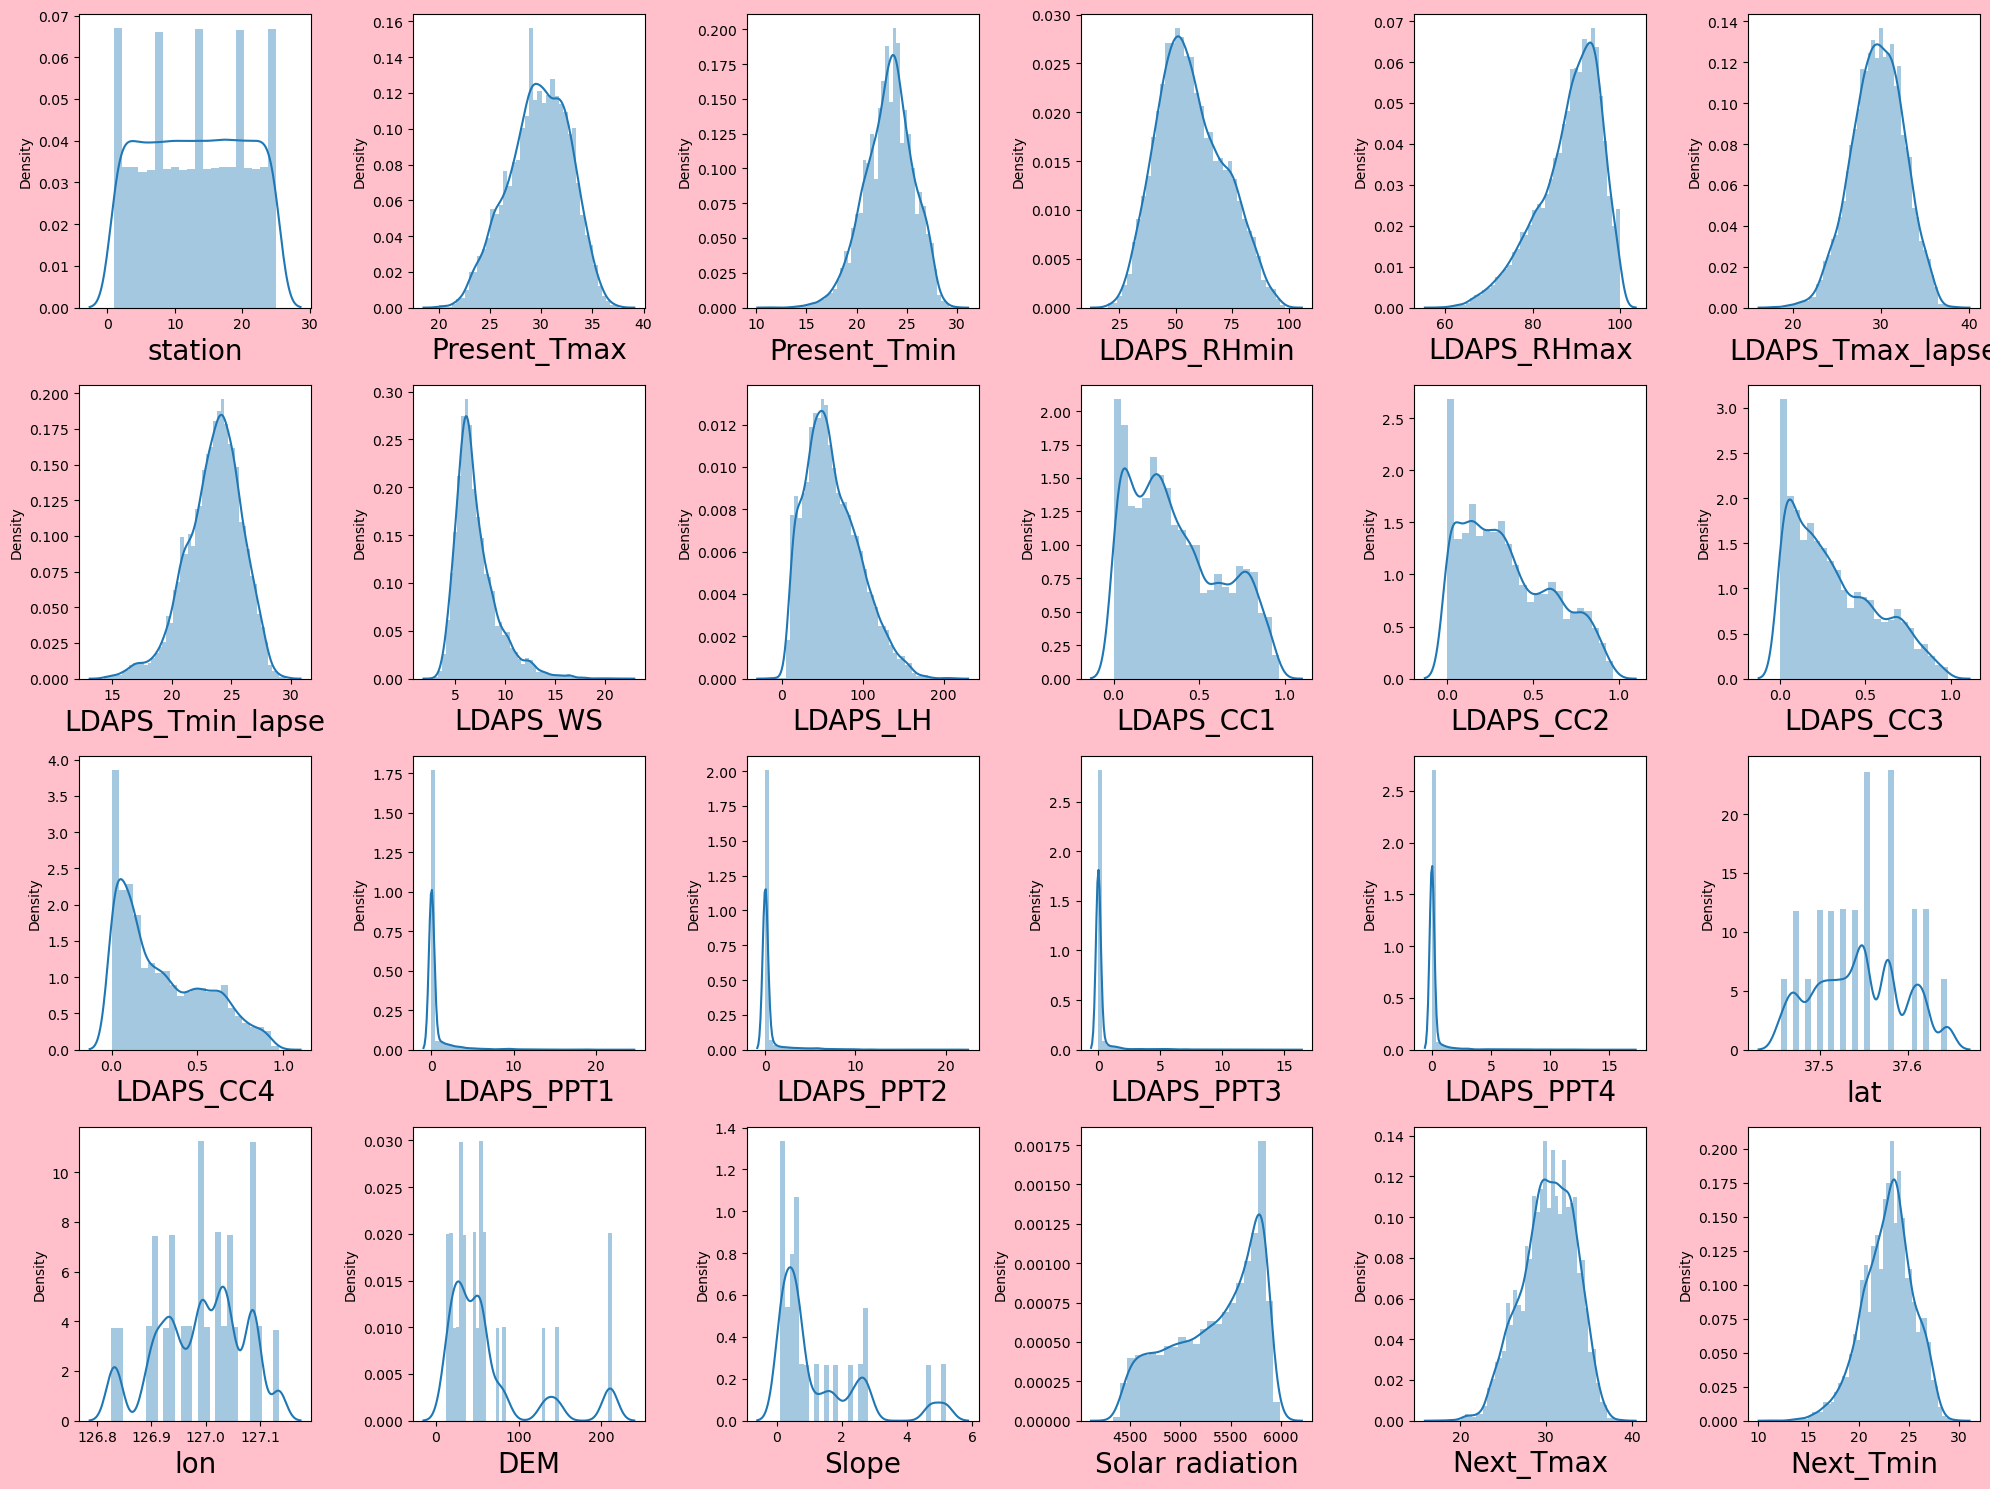

In [16]:
#To see the distribution among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in num_col:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation:

1)The count of all the columns are equal there is no missing values in the dataset.

2)When the mean value is greater than median value the distribution of data on these columns are right skewed.The columns which has this kind of distribution is [LDAPS_WS,DEM,LDAPS_PPT4,LDAPS_RHmin,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_RHmax,DEM,LDAPS_PPT4,LDAPS_PPT3]

3]When the mean value is lower than median value the distribution of data on these columns are left skewed.The columns which has this kind of distribution is [Slope,lon,LDAPS_PPT1,LDAPS_CC1,LDAPS_CC2]

4]There are so many slopes are columns [Ion,DEM,Slope]

5]Many of these columns have asymentric distribution of data.

# Corelation:

In [17]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.132129   0.006539  ...   -0.007635   -0.013865   
Present_Tmax      0.134246  -0.316333  ...   -0.104779   -0.127248   
Present_Tmin     -0.012817   0.084348  ...    0.066207   

<Axes: >

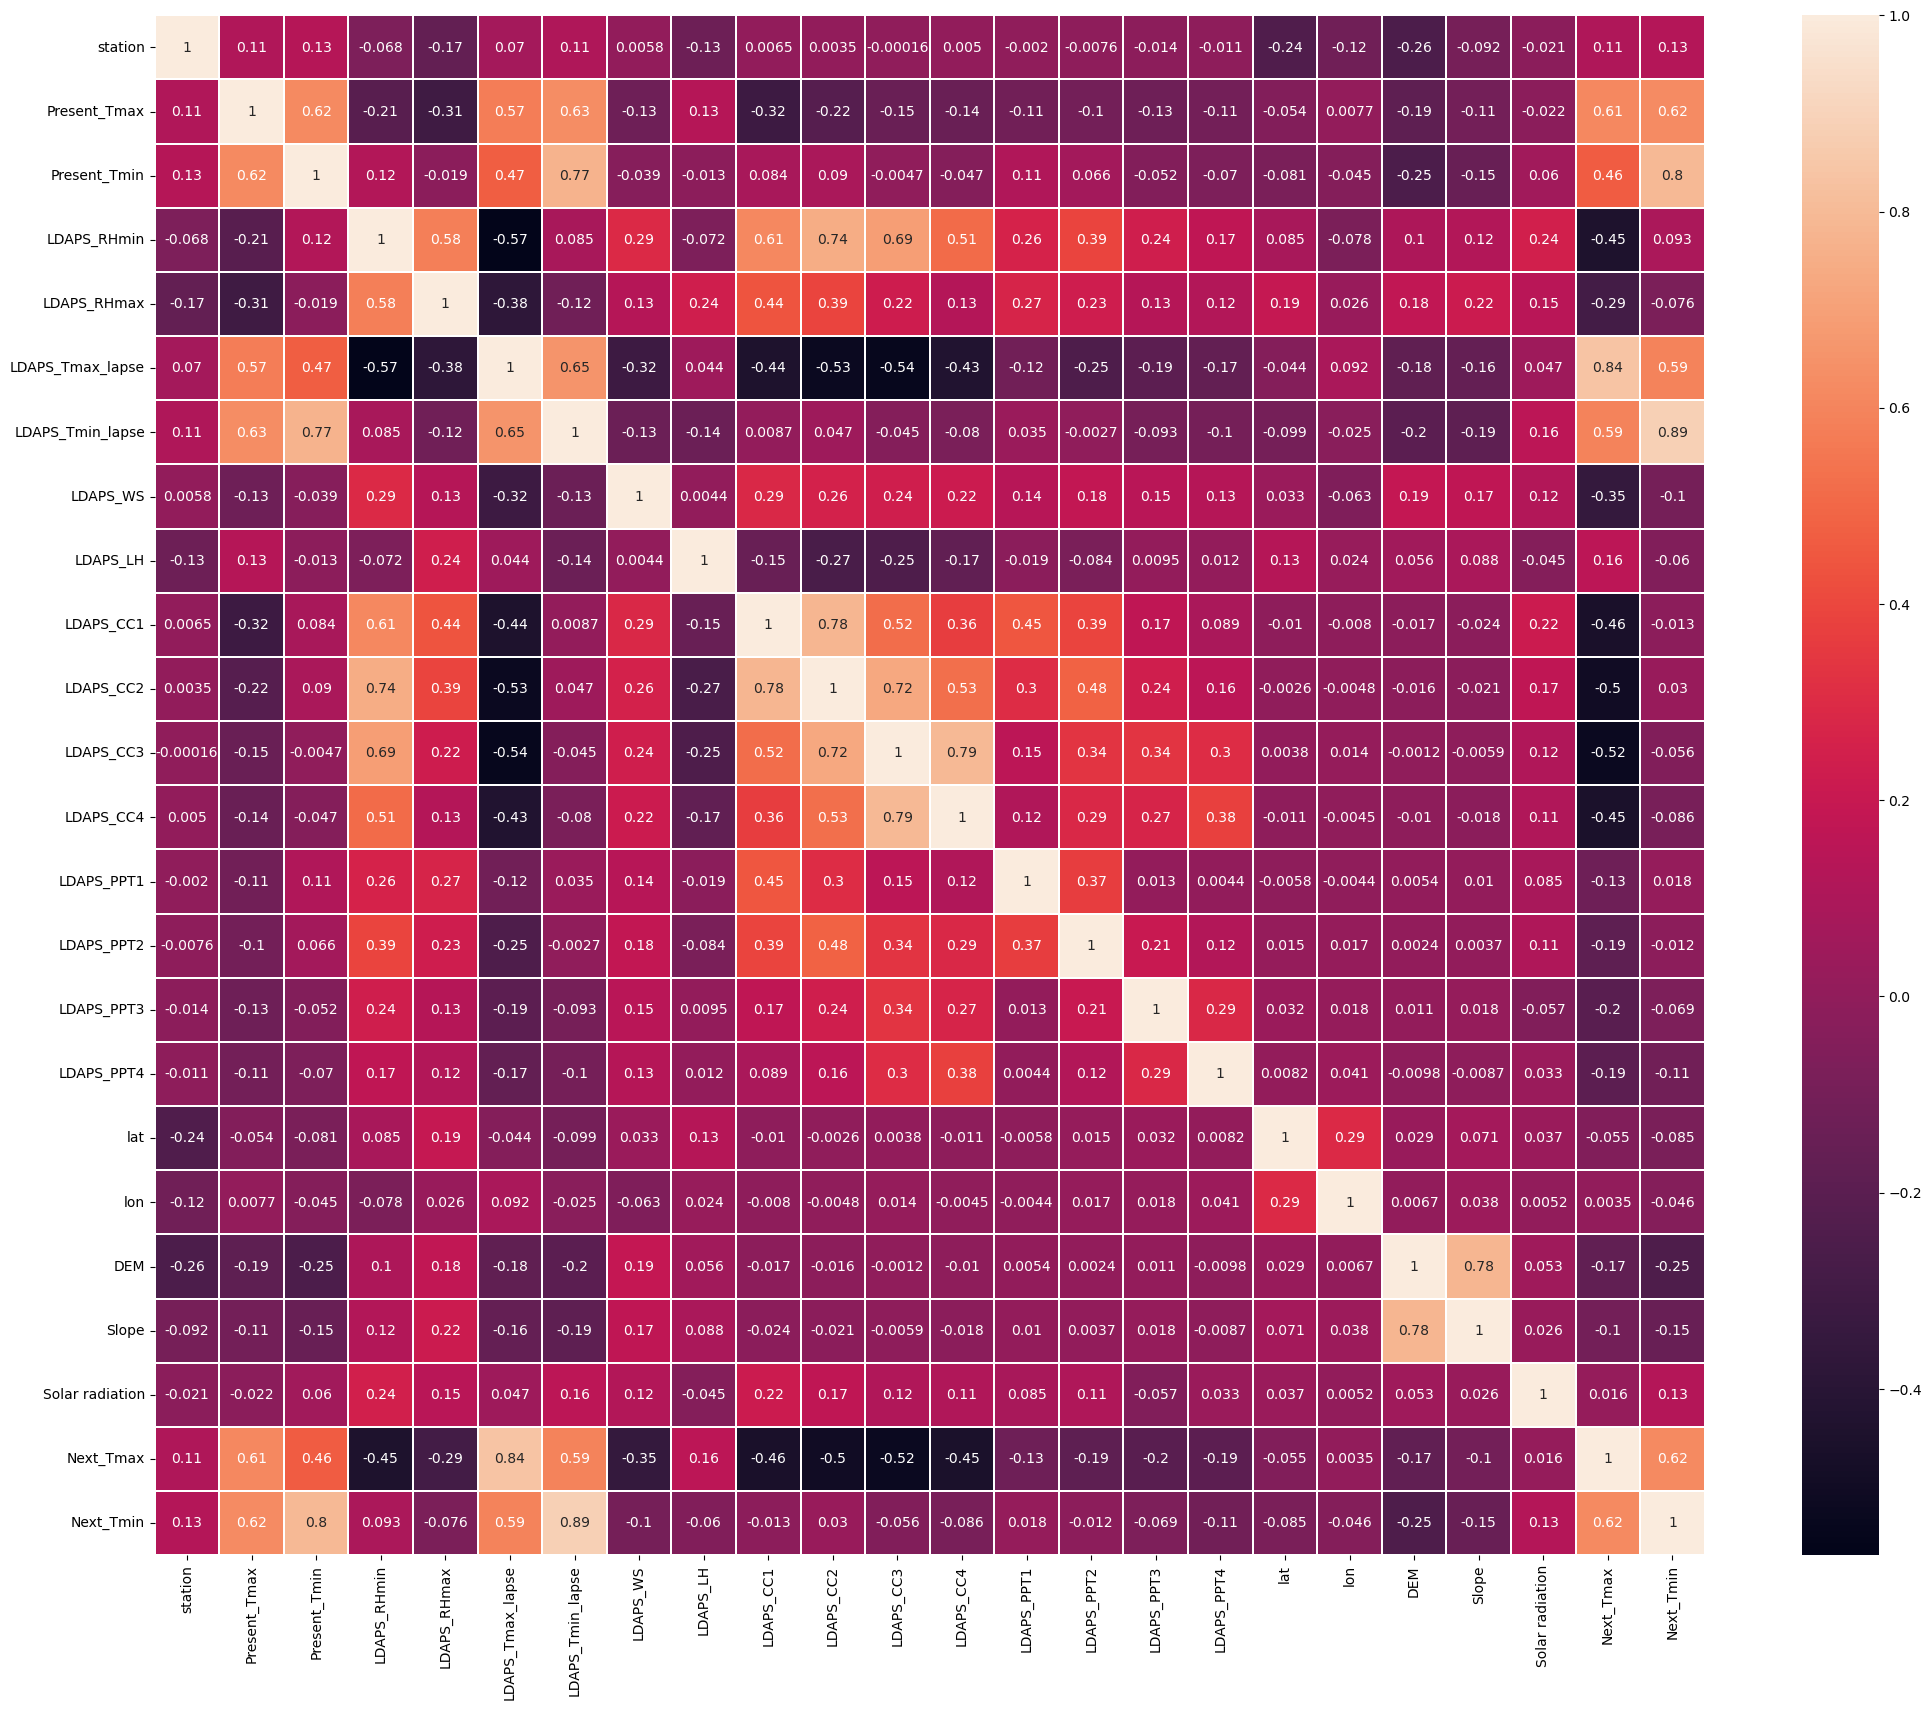

In [18]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=.25)

[Next_Tmax,Next_Tmin] : Dependent feature

For the Next_Tmax:
Postively Corelated Columns: Present_Tmax(61%),Present_Tmin(46%),LDAPS_Tmax_lapse(84%),LDAPS_Tmin_lapse(59%),Next_Tmin(62%)
Negatively Corelated Columns:LDAPS_RHmin(-45% ),'LDAPS_RHmax'(),'LDAPS_WS','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','DEM'
Zero Corelation or near to zero:All other columns have zero corelation.

For the Next_Tmin:
Postively Corelated Columns:Present_Tmax(62%),Present_Tmin(80%),LDAPS_Tmax_lapse(59%),LDAPS_Tmin_lapse(89%),Next_Tmax(62%)
Negatively Corelated Columns:'DEM'(25%)

All other columns have zero corelation.

Next_Tmin and Next_Tmax are also highly correlated with exch other


# Visualisation:

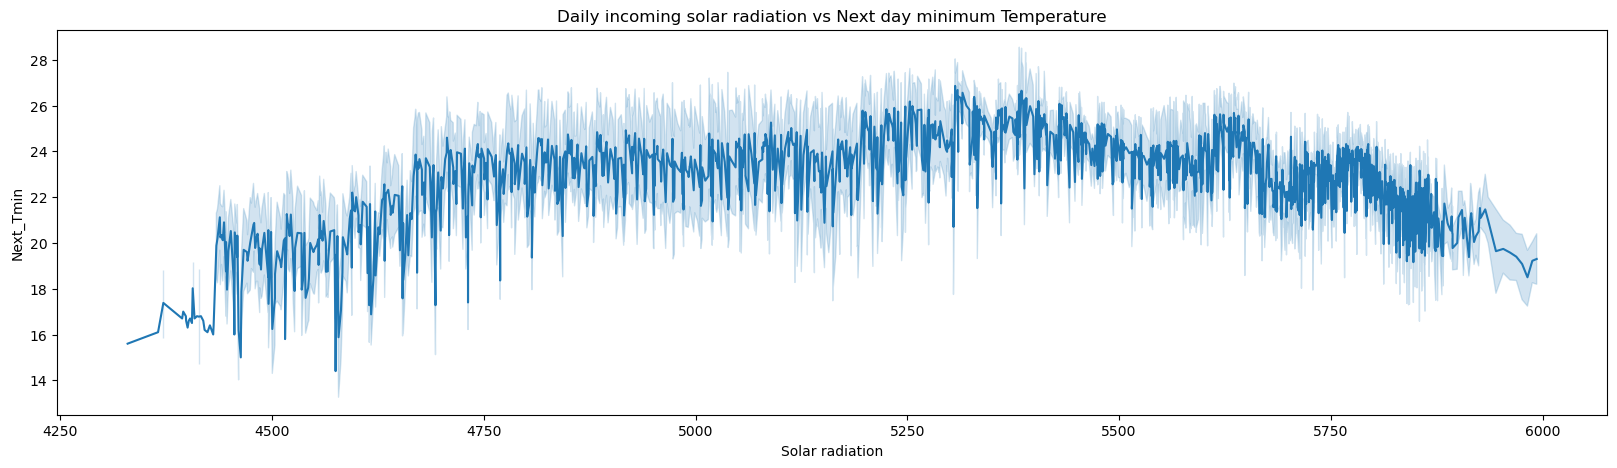

In [21]:
plt.figure(figsize=(20,5))
plt.title('solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

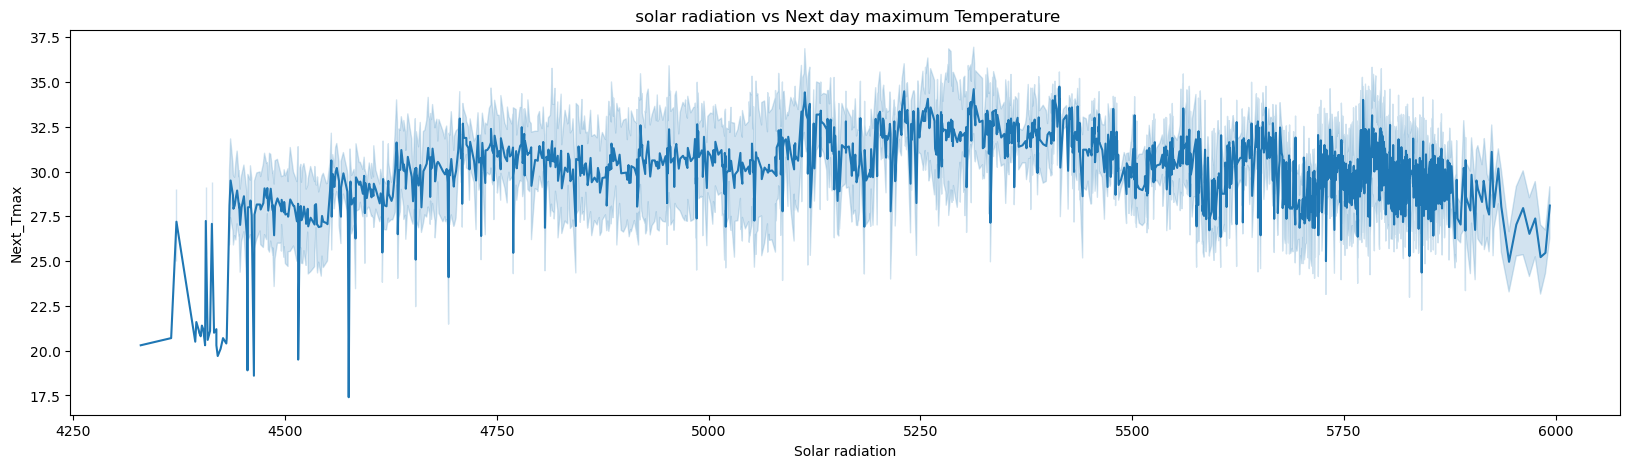

In [22]:
plt.figure(figsize=(20,5))
plt.title(' solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

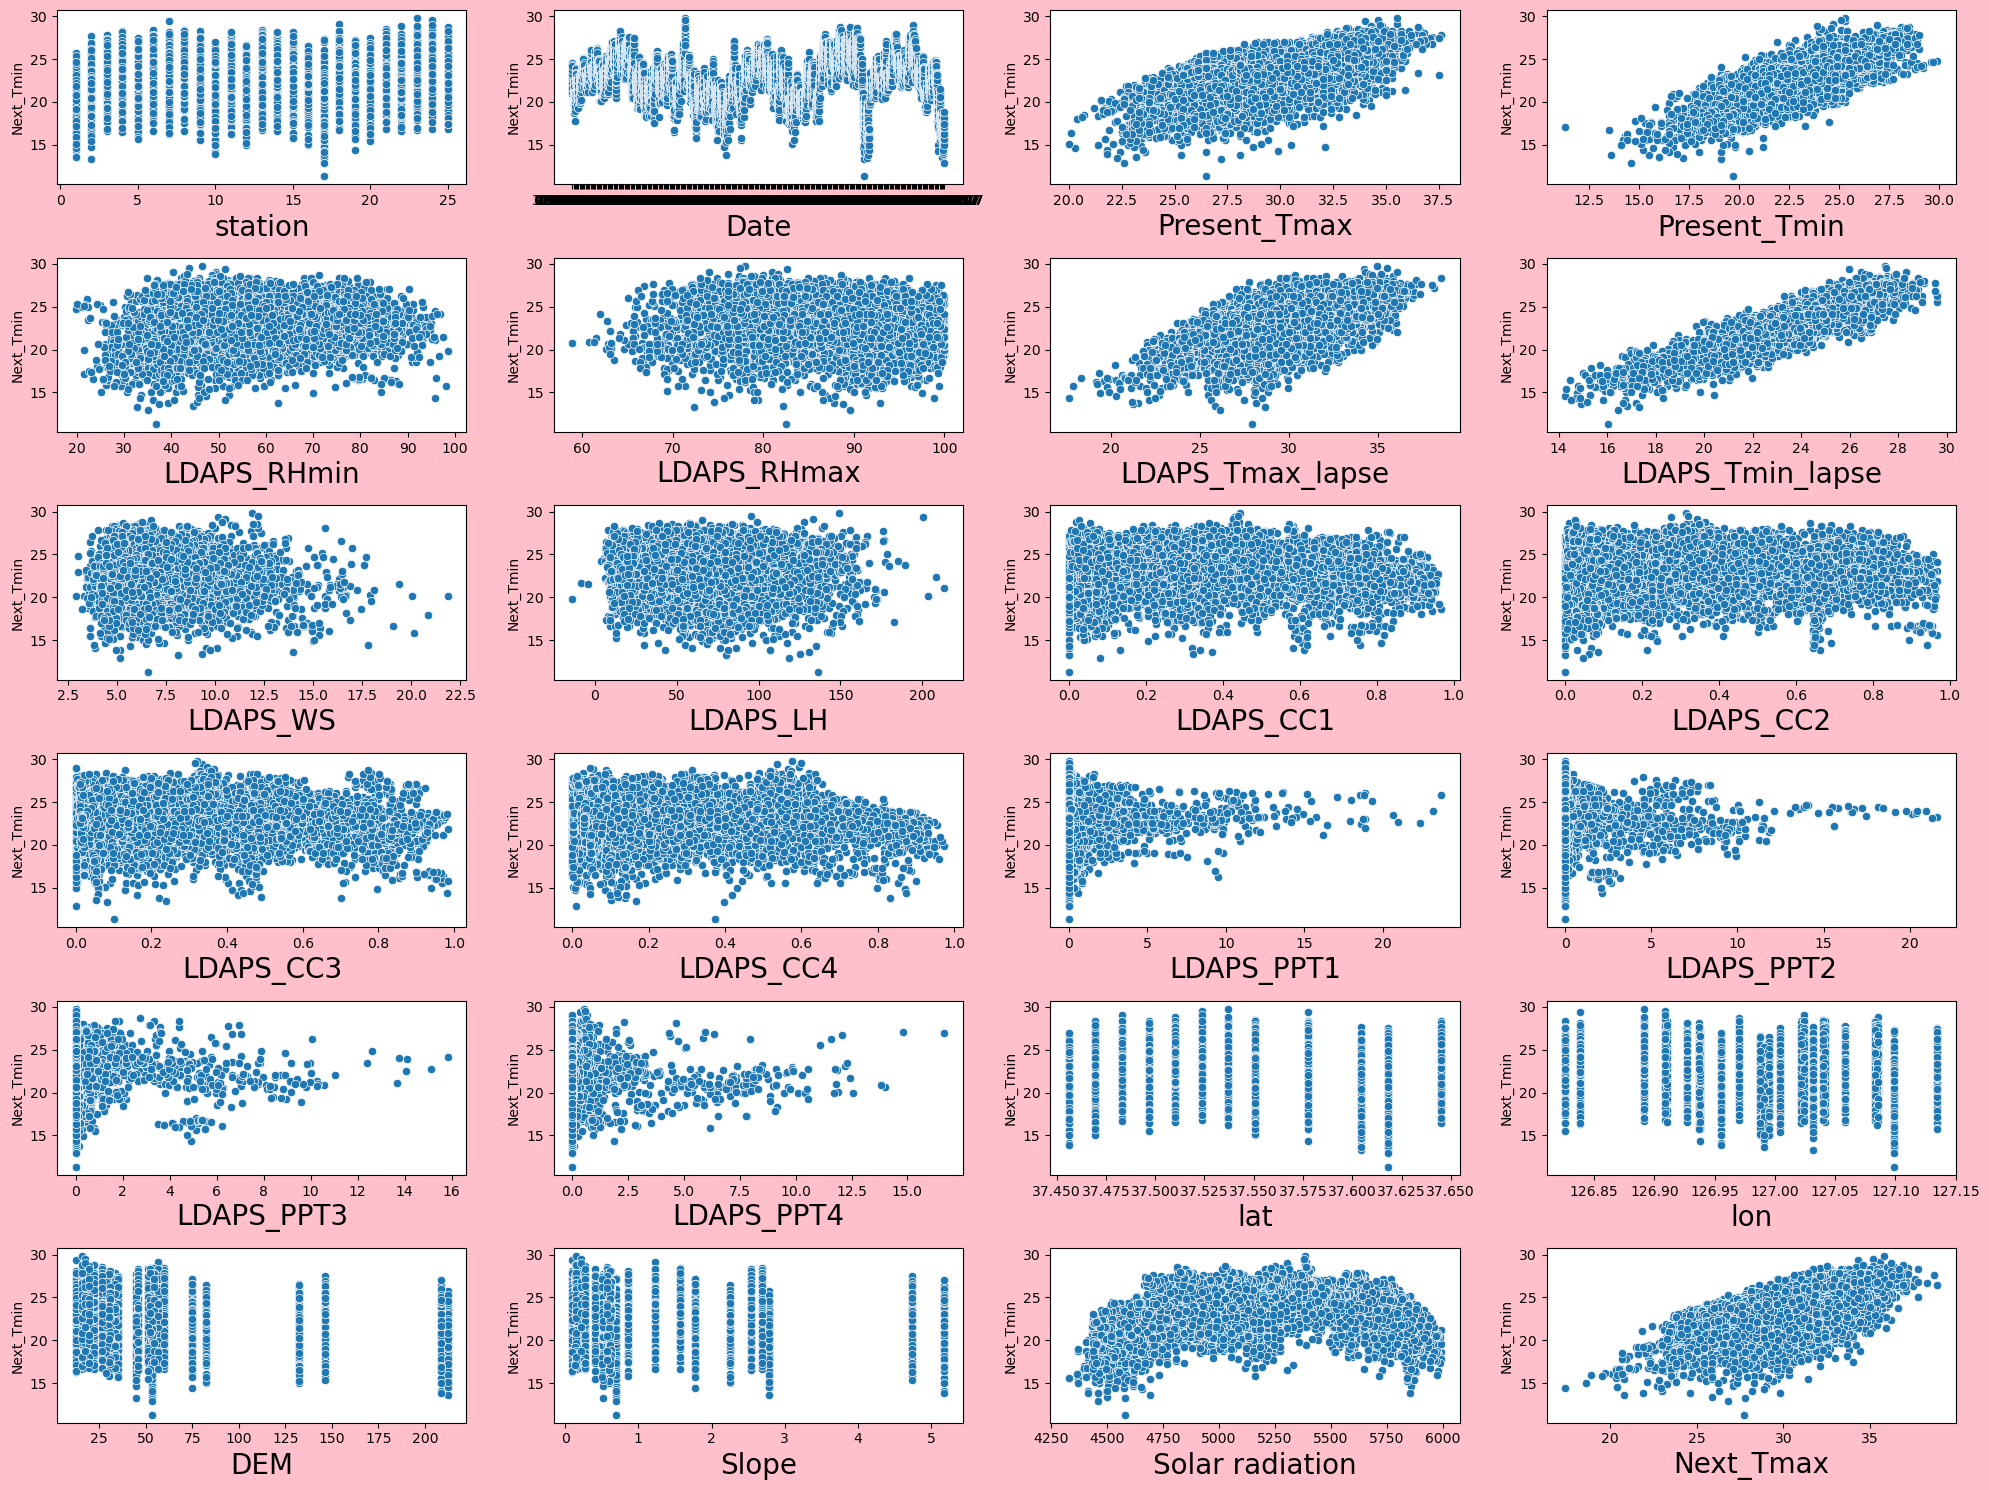

In [26]:
#To see the co-relation among the columns with respect to region:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.scatterplot(x=column,y="Next_Tmin",data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

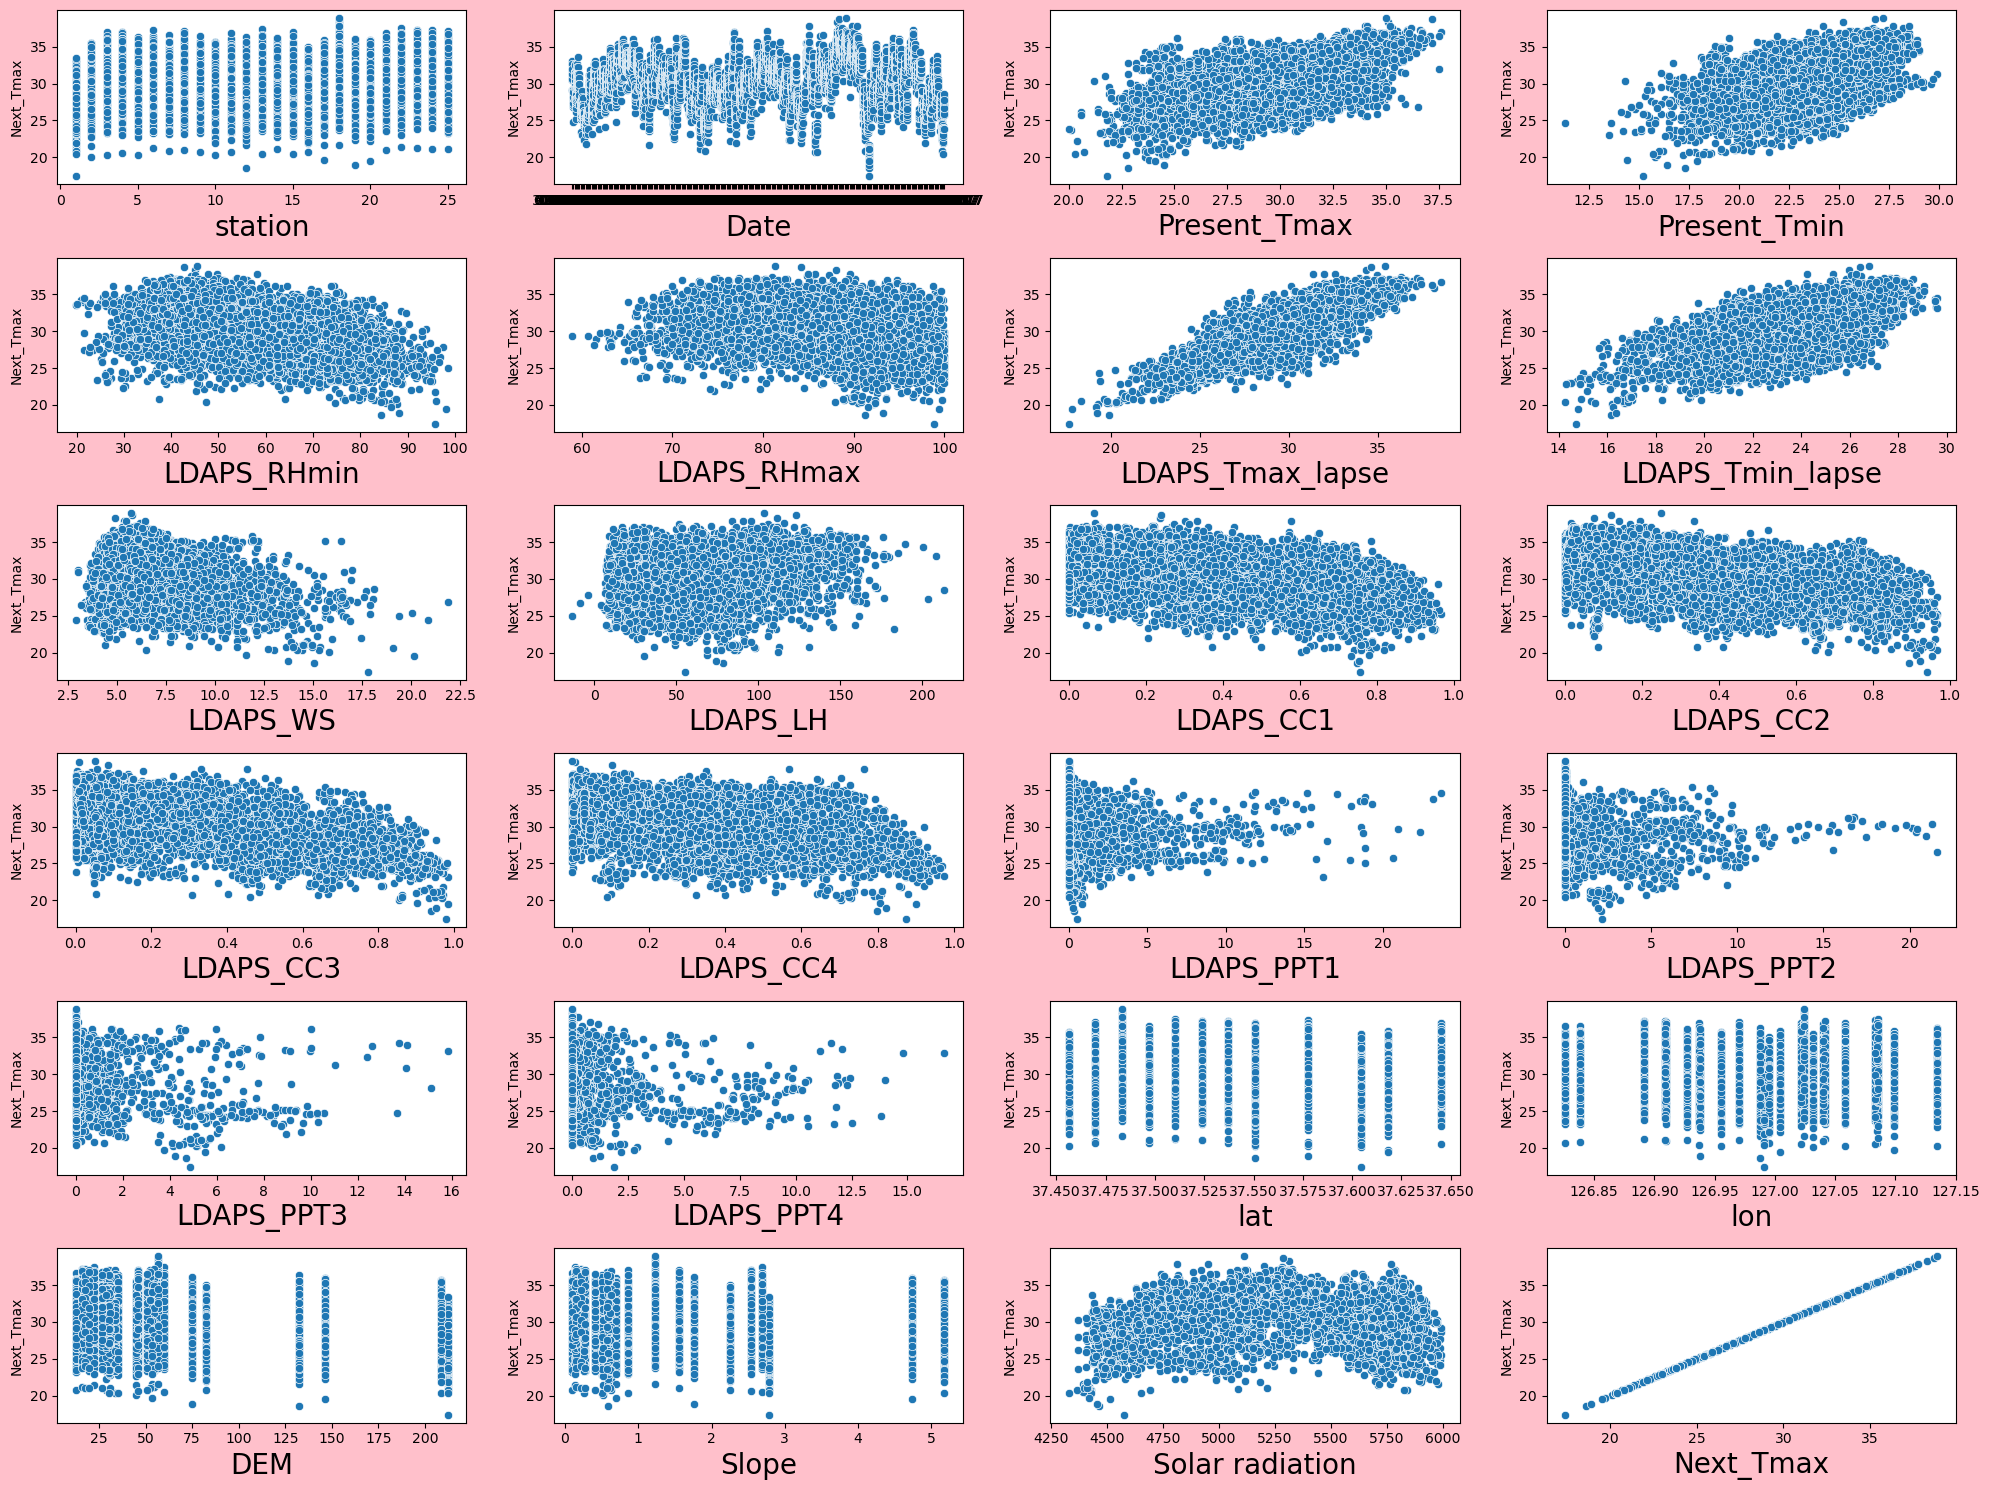

In [27]:
#To see the co-relation among the columns with respect to region:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.scatterplot(x=column,y="Next_Tmax",data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Next_Tmax', ylabel='Density'>

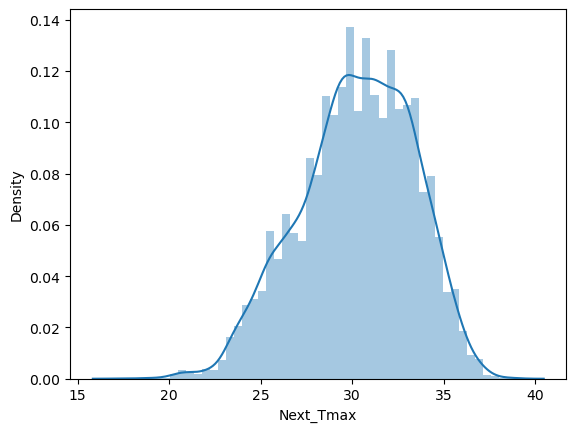

In [28]:
sns.distplot(df['Next_Tmax'],kde=True)

<Axes: xlabel='Next_Tmin', ylabel='Density'>

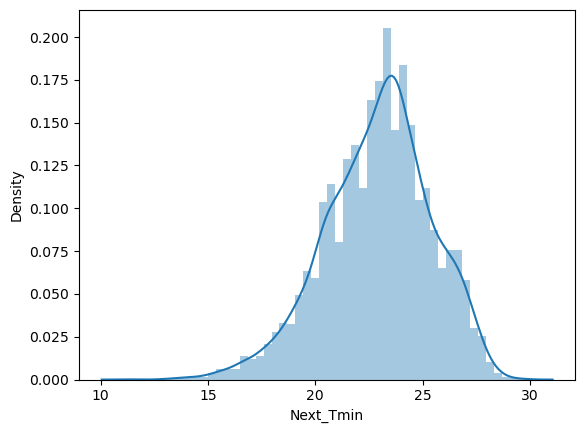

In [29]:
sns.distplot(df['Next_Tmin'],kde=True)

In [30]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

# Skewness :

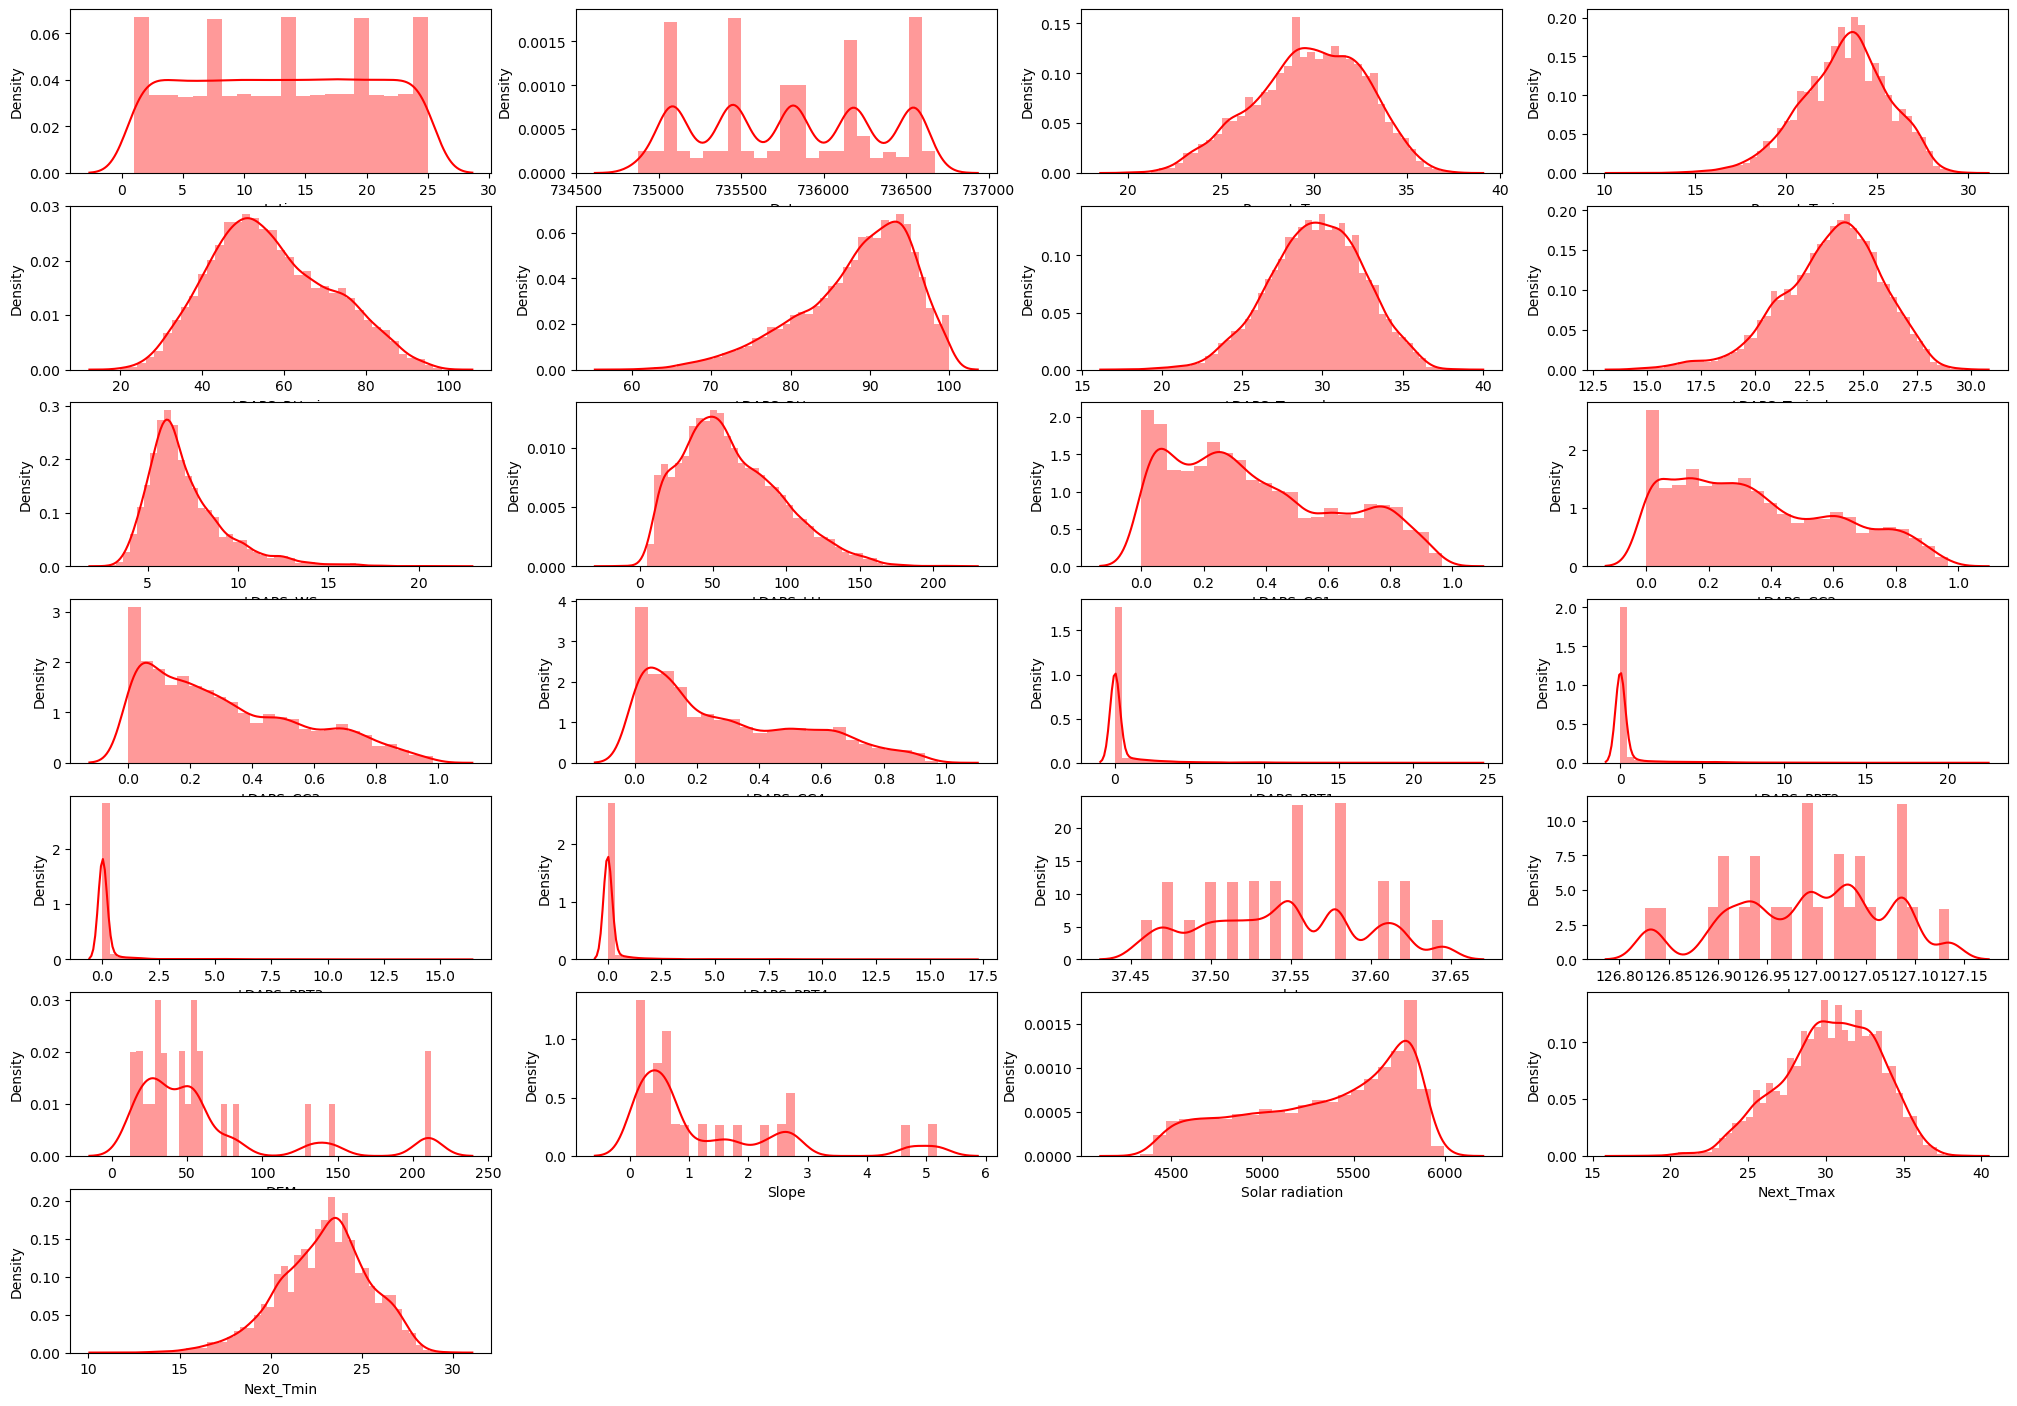

In [33]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [34]:
#To Check the skewness:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

skewness more than+/- 0.5 will we treated

In [35]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [36]:
df.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

# Outliers

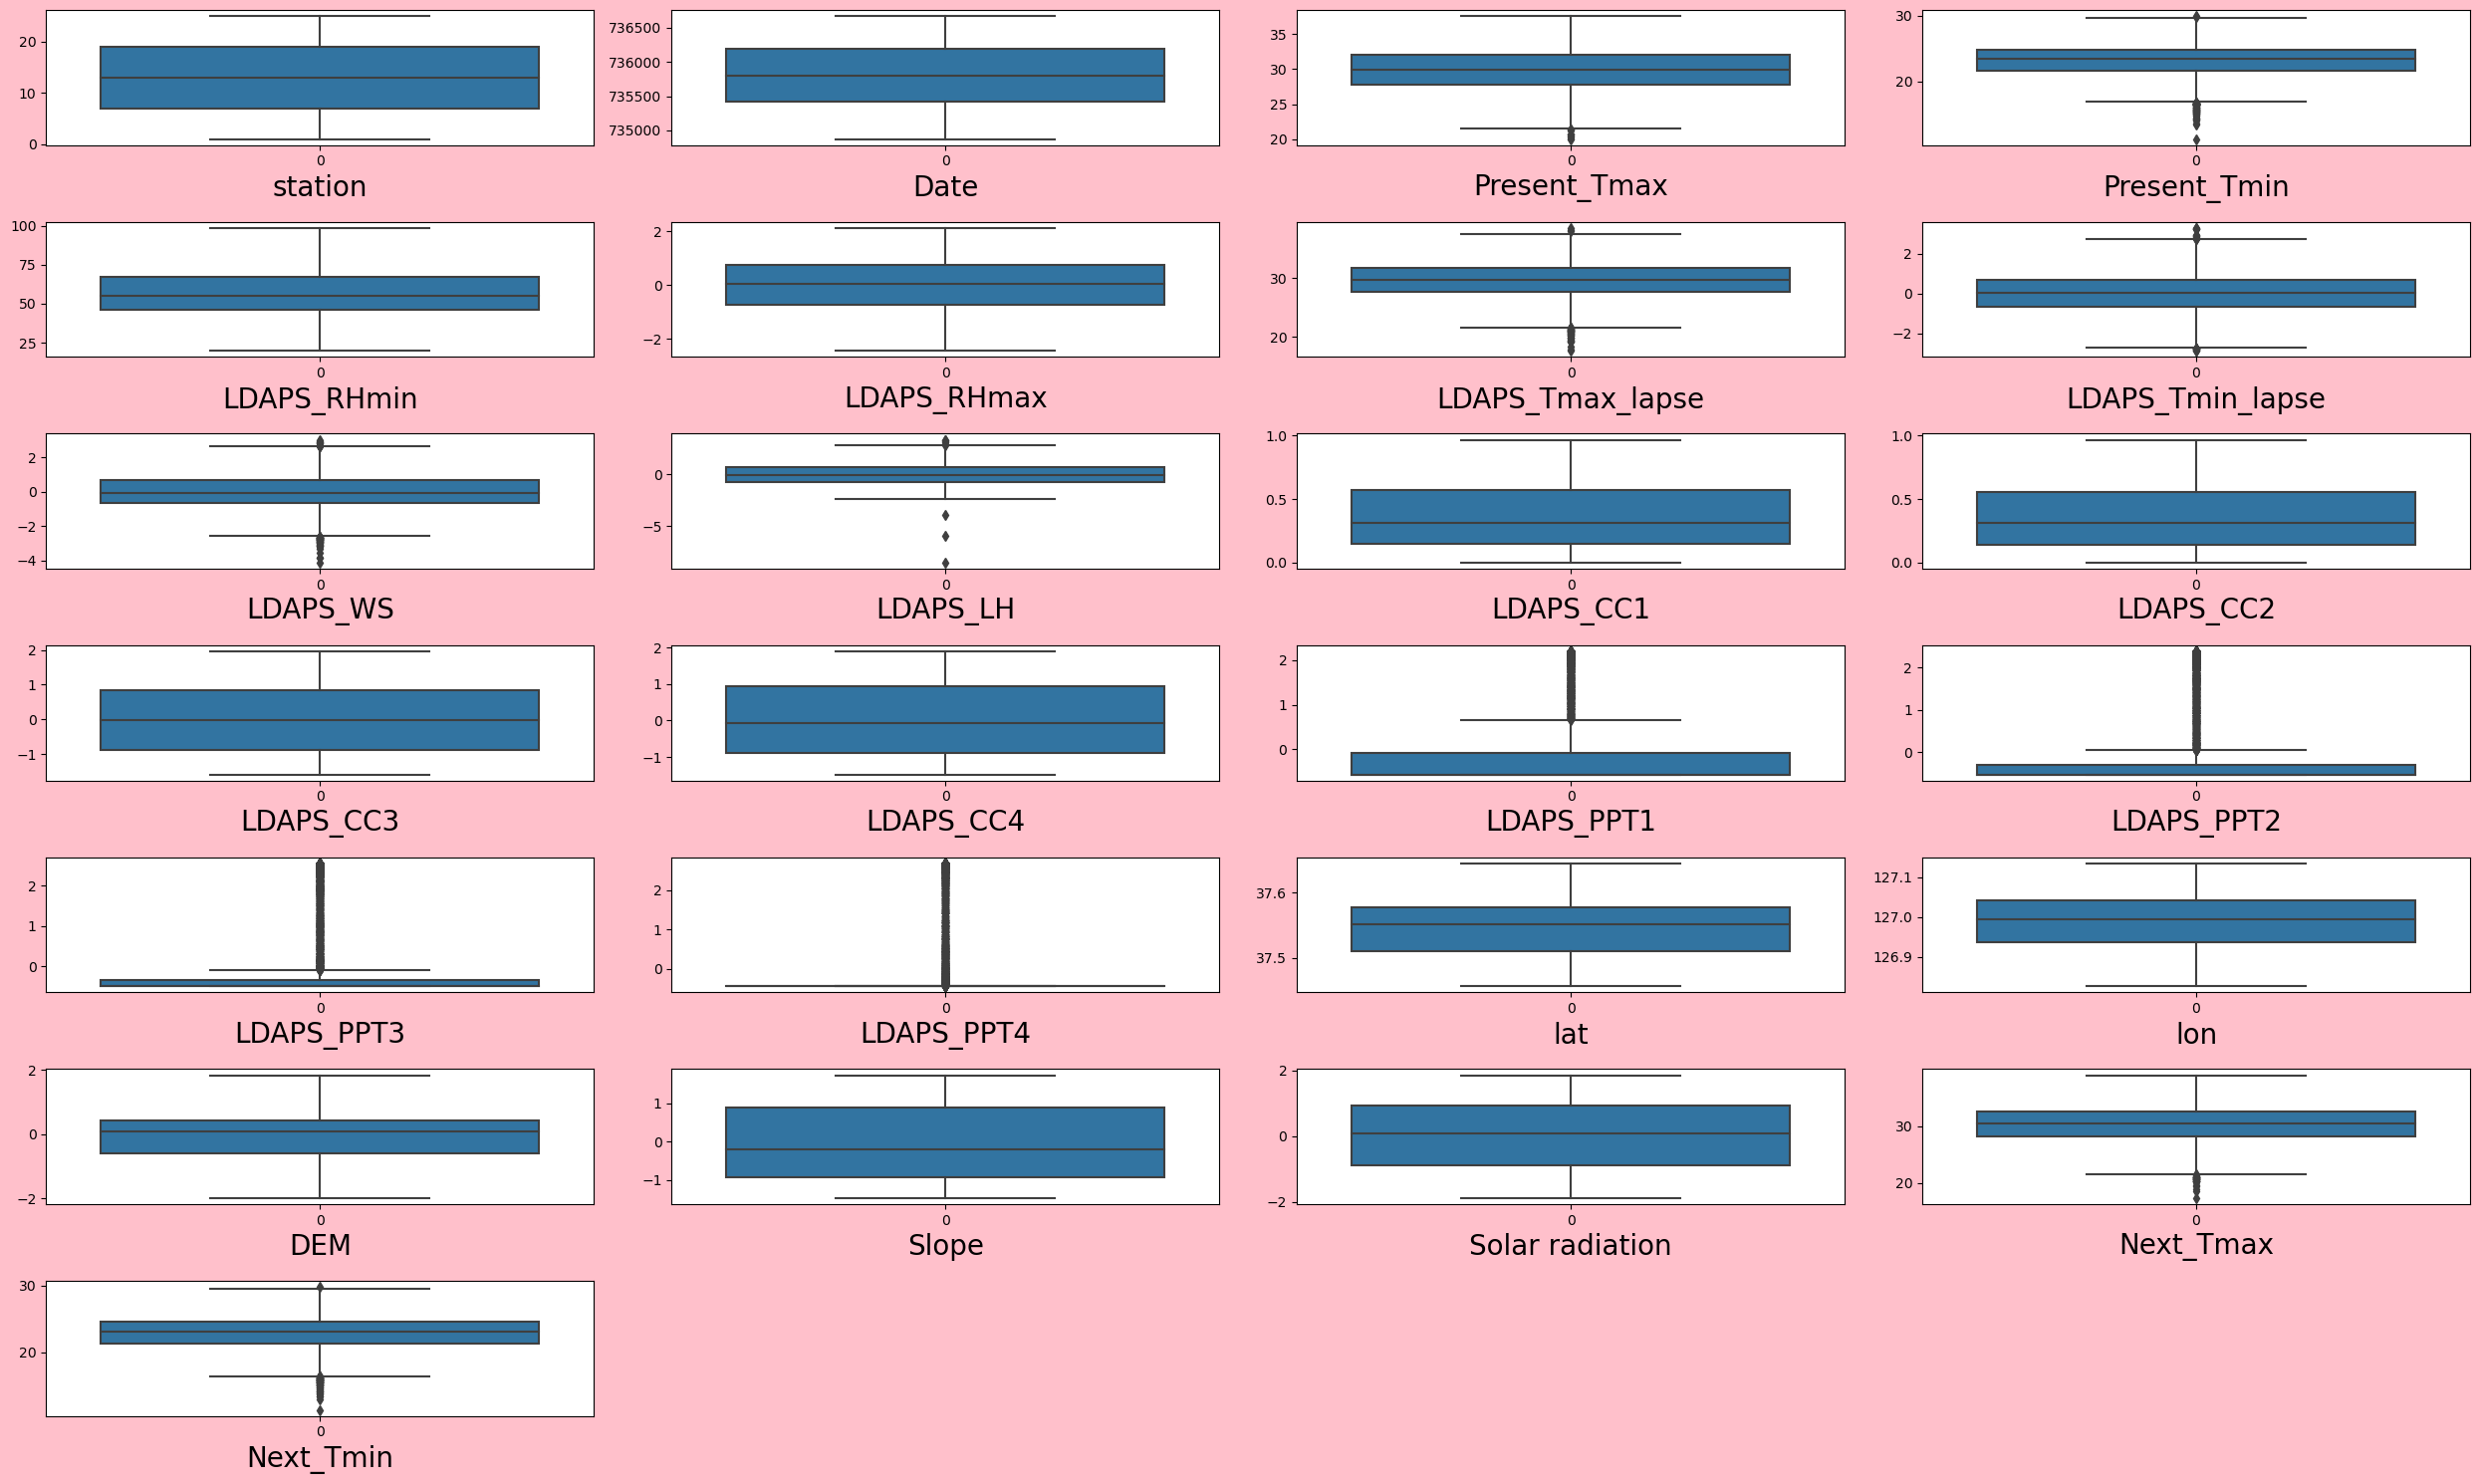

In [40]:
#To see the outliers among the columns:
plt.figure(figsize=(25,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [41]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([1751, 2091, 2154, 2316, 2413, 2425, 2591, 2599, 2633, 2699, 2700,
       2708, 2733, 3123, 3141, 3147, 3148, 3148, 3166, 3172, 3173, 3223,
       3435, 3437, 3481, 3522, 4281, 4506, 4531, 4656, 4708, 4964, 4989,
       4989, 5014, 5379, 5675, 5949, 5959, 5967, 5972, 5973, 5982, 5983,
       5991, 5997, 5998, 6007, 6007, 6008, 6016, 6023, 6032, 6032, 6033,
       6035, 6041, 6048, 6048, 6050, 6051, 6057, 6057, 6057, 6057, 6058,
       6058, 6058, 6059, 6059, 6060, 6060, 6061, 6061, 6062, 6063, 6063,
       6065, 6065, 6066, 6066, 6066, 6067, 6068, 6068, 6068, 6069, 6069,
       6071, 6071, 6072, 6072, 6073, 6073, 6073, 6074, 6075, 6075, 6076,
       6076, 6077, 6117, 6140, 6957, 6970, 6971, 6979, 6980, 6981, 7450,
       7457, 7474, 7481, 7506, 7515, 7515, 7539, 7539, 7539, 7539, 7539,
       7540, 7547, 7549, 7553, 7554, 7556, 7557, 7557, 7563, 7563, 7563,
       7564, 7564, 7571, 7572, 7572, 7574, 7578, 7579, 7579, 7581, 7582],
      dtype=int64), array([ 9,  8,  8,  9,  8,  8

In [42]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (7482, 25)


# IQR

In [43]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

28.295692022091075

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(4175, 25)


Z-Score is better for this dataset because of the less dataloss

# Splitting The Dataset Into Feature and Target:

In [65]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [48]:
X=df.drop(["Next_Tmax","Next_Tmin"],axis=1)
Y=df[["Next_Tmax"]]

# Normalisation:

In [50]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(X)

# Random State selection:

In [52]:
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x_scaled,Y,test_size=.20,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8096121751155569  on Random_state  30


In [57]:
# spliting data 70% for train and 30% for test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=.20,random_state=maxRS)

# Model:

In [58]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [64]:
for m in model:
    print('Accuracy score:', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,X,Y,cv=5)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y_test,pred)-abs(score.mean()))
    print('*'*50)

Accuracy score: LinearRegression()
R2 Score:                 0.8096121751155569
Mean Absolute Error:      1.0515141645451629
Mean Squared error:       1.8799905877361465
Root Mean Squared Error:  1.3711274877764454
[0.67469722 0.64684701 0.68047762 0.80722324 0.60351301]
cross validation score:   0.6825516196886424
Difference between R2 score and cross validatio score is :   0.12706055542691452
**************************************************
Accuracy score: RandomForestRegressor()
R2 Score:                 0.9224907031684739
Mean Absolute Error:      0.6583544137022402
Mean Squared error:       0.7653679986824775
Root Mean Squared Error:  0.874853129778066
[0.71665377 0.67097885 0.64045792 0.81344028 0.50252959]
cross validation score:   0.6688120816262064
Difference between R2 score and cross validatio score is :   0.2536786215422675
**************************************************
Accuracy score: DecisionTreeRegressor()
R2 Score:                 0.8202506419135278
Mean Absolute 

# Top model-1:

Accuracy score: LinearRegression()

R2 Score:                 0.8096121751155569

cross validation score:   0.4251871536144686

Difference between R2 score and cross validatio score is :   0.3950634882990592

# Top model:2

Accuracy score: Ridge()

R2 Score:                 0.8089904950313519
    
cross validation score:   0.6825987354148445

Difference between R2 score and cross validatio score is :   0.1263917596165074

# Hyper Parameter Tuning - Model-1

In [75]:
param= {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

grid_search = GridSearchCV(LR, param, cv=5)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [68]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [69]:
grid_search.best_score_

0.7637790711146676

# Hyper Parameter Tuning - Model-2

In [72]:
parameters = {'max_iter' :[0,5,10,15],
              'random_state':[20,30,40],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y_train)
clf.best_params_  

{'max_iter': 15, 'random_state': 20, 'solver': 'sparse_cg'}

In [73]:
clf_pred=clf.best_estimator_.predict(x_test)

In [74]:
r2_score(y1_test, clf_pred)

0.8091532563029156

Finalising the model :Ridge Regression

# Saving the Model

In [81]:
import joblib
joblib.dump(Rd,"Temperature Forecast project Next_Tmax.pkl")

['Temperature Forecast project Next_Tmax.pkl']

# Dependent Feature:Next_Tmin

In [77]:
X=df.drop(["Next_Tmax","Next_Tmin"],axis=1)
Y=df[["Next_Tmin"]]

In [78]:
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x_scaled,Y,test_size=.20,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8573563834759806  on Random_state  60


In [88]:
x_train,x_test,y1_train,y1_test=train_test_split(x_scaled,Y,test_size=.20,random_state=60)

# Model:

In [89]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [90]:
for m in model:
    print('Accuracy score:', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,X,Y,cv=5)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print('*'*50)

Accuracy score: LinearRegression()
R2 Score:                 0.8573563834759806
Mean Absolute Error:      0.7597917368858328
Mean Squared error:       0.9283883601666328
Root Mean Squared Error:  0.9635291174461895
[0.70176023 0.65436577 0.79585794 0.87124726 0.84663676]
cross validation score:   0.7739735886861783
Difference between R2 score and cross validatio score is :   0.08338279478980237
**************************************************
Accuracy score: RandomForestRegressor()
R2 Score:                 0.920371030008396
Mean Absolute Error:      0.5422977602108034
Mean Squared error:       0.5182608985507241
Root Mean Squared Error:  0.7199033952904543
[0.44986791 0.67966882 0.81976326 0.87011904 0.86722745]
cross validation score:   0.7373292951581026
Difference between R2 score and cross validatio score is :   0.1830417348502934
**************************************************
Accuracy score: DecisionTreeRegressor()
R2 Score:                 0.8153397892295442
Mean Absolute 

# Top Model:1

Accuracy score: LinearRegression()

R2 Score:                 0.8573563834759806

cross validation score:   0.7739735886861783

Difference between R2 score and cross validatio score is :   0.08338279478980237

# Top Model:2

Accuracy score: Ridge()

R2 Score:                 0.8572495489971846

cross validation score:   0.7740260346277716

Difference between R2 score and cross validatio score is :   0.083223514369413

# Hyperparameter Tuning

In [91]:
parameters = {'max_iter' :[0,5,10,15],
              'random_state':[20,30,40],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y_train)
clf.best_params_  

{'max_iter': 15, 'random_state': 30, 'solver': 'sag'}

In [92]:
clf_pred=clf.best_estimator_.predict(x_test)

In [93]:
r2_score(y1_test, clf_pred)

0.8572333178927982

Not much difference in ridge regression

In [95]:
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1]}
LR=LinearRegression()

clf = GridSearchCV(LinearRegression(), parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_ 

{'fit_intercept': True, 'n_jobs': -1}

In [98]:
clf_pred=clf.best_estimator_.predict(x_test)

0.8580563834759806

Finalising the model:Linear Regression for the Next_Tmin

# Saving the Model:

In [100]:
import joblib
joblib.dump(LR,"Temperature Forecast project Next_Tmin.pkl")

['Temperature Forecast project Next_Tmin.pkl']

In [ ]:
#End of the Project